In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

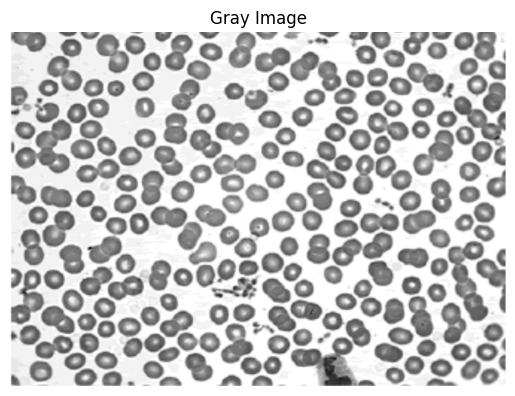

In [14]:
img = cv2.imread('cells.png')

gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')

plt.show()

# Method 1: Gaussian Blur + Canny + Contours

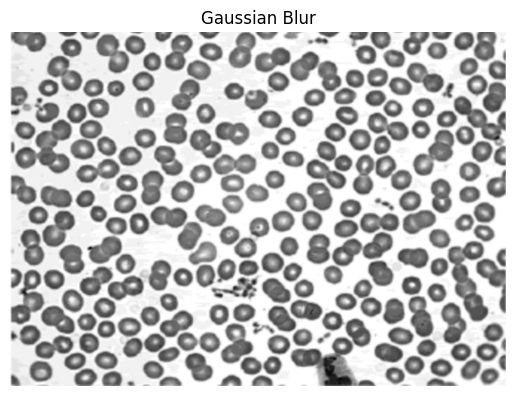

In [15]:
blur = cv2.GaussianBlur(gray, (5,5), 0)


plt.imshow(blur , cmap='gray')
plt.title('Gaussian Blur')
plt.axis('off')

plt.show()

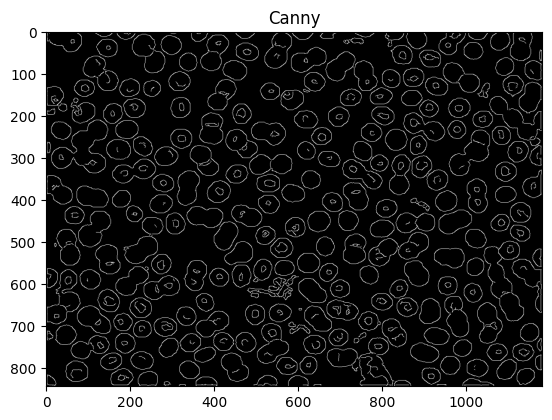

In [16]:
canny = cv2.Canny(blur, 25, 100)
plt.imshow(canny, cmap='gray')


plt.imshow(canny , cmap='gray')
plt.title('Canny')
plt.show()


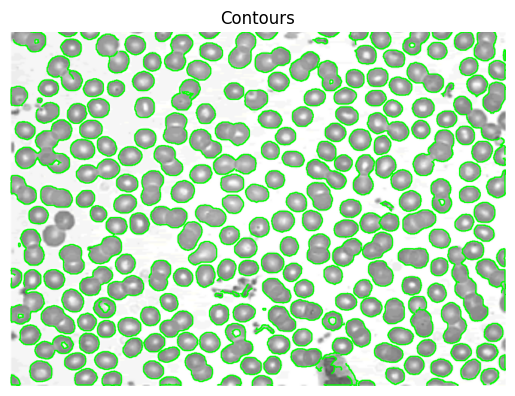

number of cells in the image:  260


In [17]:
MIN_CONTOUR_AREA = 13
MAX_CONTOUR_AREA = 3900

(counts, hierarchy) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
method_a = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

filtered_counts = []

count_canny = 0

for c in counts:
    area = cv2.contourArea(c)

    if MAX_CONTOUR_AREA > area > MIN_CONTOUR_AREA:
        filtered_counts.append(c)
        count_canny = count_canny + 1

cv2.drawContours(method_a, filtered_counts, -1, (0, 255, 0), 2)

plt.imshow(method_a)

plt.title('Contours')
plt.axis('off')
plt.show()

print("number of cells in the image: ", count_canny)

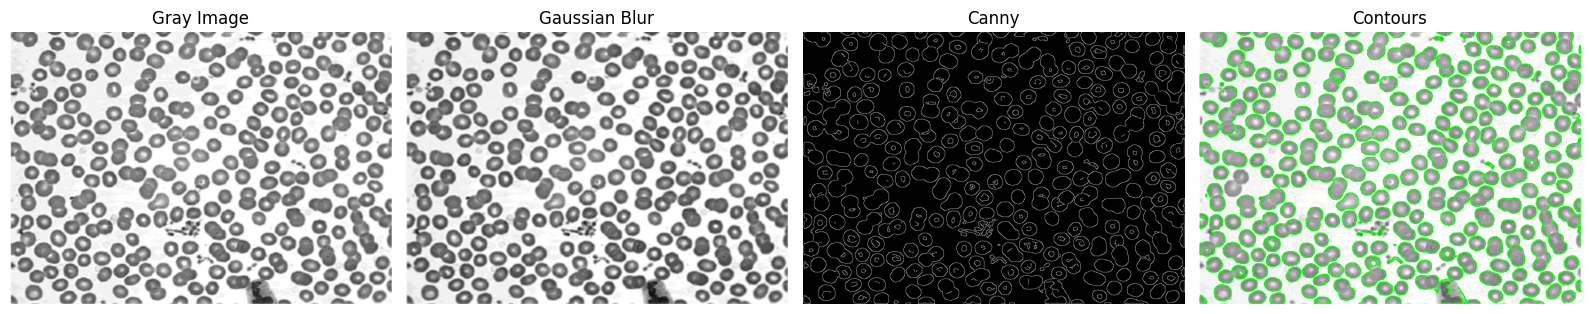

In [18]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

titles = ['Gray Image', 'Gaussian Blur', 'Canny', 'Contours']
images = [gray, blur, canny, rgb]
cmaps = ['gray', 'gray', 'gray', None]

for i in range(4):
    axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()


## Method 2: Gaussian Blur + Hough Circle

Number of detected cells: 285


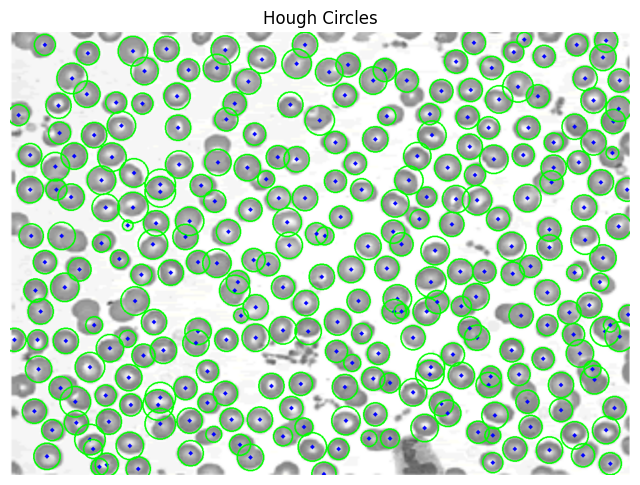

In [19]:
img = cv2.imread('cells.png')

img_copy = img.copy()
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (9, 9), 0)

circles = cv2.HoughCircles(
    img_blur,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=14,
    param1=35,
    param2=20,
    minRadius=10,
    maxRadius=30
)

if circles is not None:
    circles = np.uint16(np.around(circles))

    # Draw detected circles
    for c in circles[0, :]:
        # Outer circle
        cv2.circle(img, (c[0], c[1]), c[2], (0, 255, 0), 2)
        # Center of the circle
        cv2.circle(img, (c[0], c[1]), 2, (255, 0, 0), 3)

    print("Number of detected cells:", len(circles[0]))
else:
    print("No circles detected.")

method_b = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8, 8))
plt.imshow(method_b)
plt.title('Hough Circles')
plt.axis('off')
plt.show()

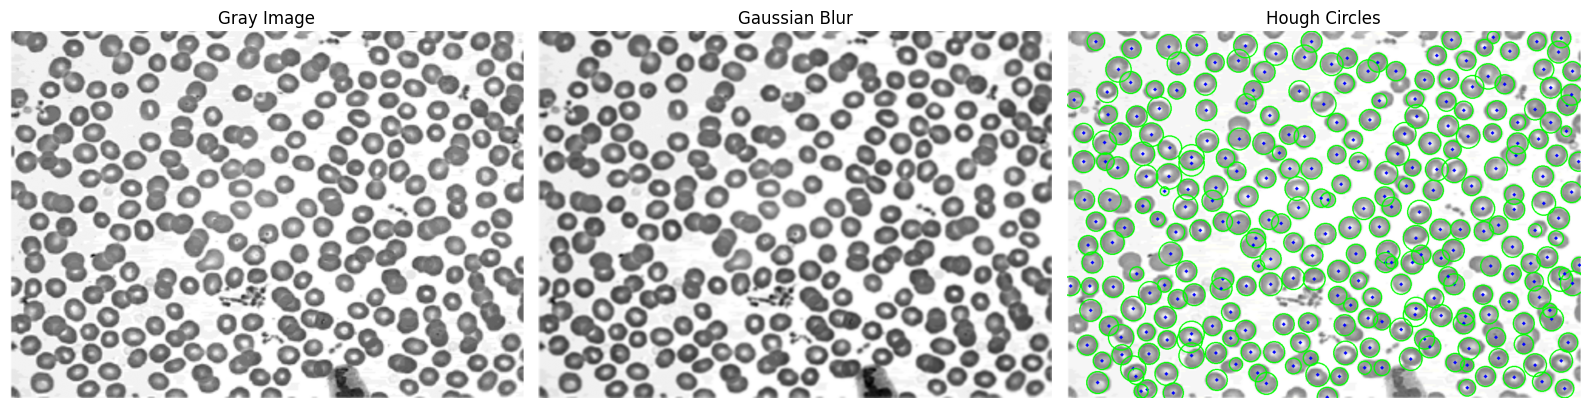

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

titles = ['Gray Image', 'Gaussian Blur', 'Hough Circles']
images = [img_gray, img_blur,  method_b]
cmaps = ['gray', 'gray',  None]

for i in range(3):
    axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()

## Method 3: OTSU Threshold + Erosion & Dilation + Contours

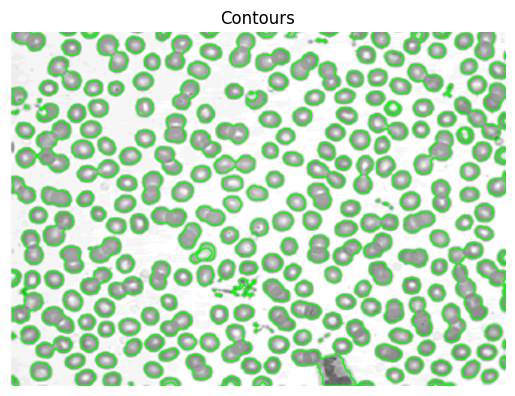

Total cell count: 246
Total contours found: 246


In [21]:
img = cv2.imread('cells.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Gaussian Blur
blurred = cv2.GaussianBlur(gray, (7, 7), 0)

_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

# Erosion + Dilation
erosion_blob = cv2.erode(binary, kernel, iterations=5)
dilate_blob = cv2.dilate(erosion_blob, kernel, iterations=1)

cleaned = dilate_blob

# Connected Components
num_labels, labels = cv2.connectedComponents(cleaned)
count = num_labels - 1

# Contours
method_c = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(method_c, contours, -1, (0, 255, 0), 2)

plt.imshow(method_c, cmap='gray')
plt.title('Contours')
plt.axis('off')
plt.show()

print(f"Total cell count: {count}")
print(f"Total contours found: {len(contours)}")

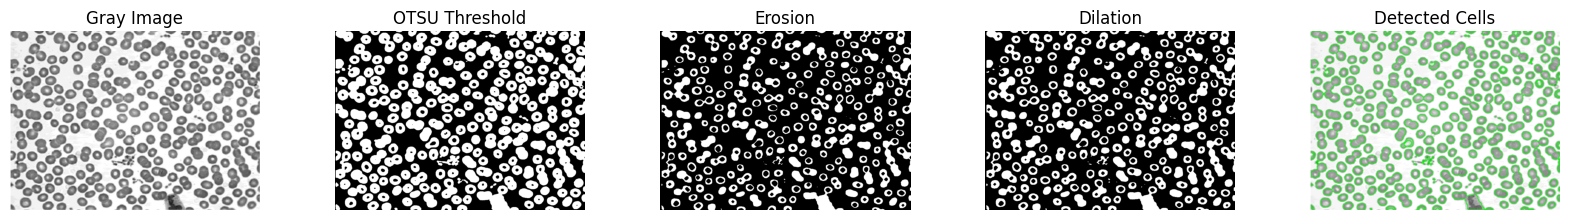

In [23]:

fig, axes = plt.subplots(1, 5, figsize=(20, 4))

titles = ['Gray Image', 'OTSU Threshold', 'Erosion', 'Dilation', 'Detected Cells']
images = [gray, binary, erosion_blob, dilate_blob, method_c]
cmaps = ['gray', 'gray', 'gray', 'gray', None]

for i in range(5):
    if cmaps[i] is None:
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)
plt.show()


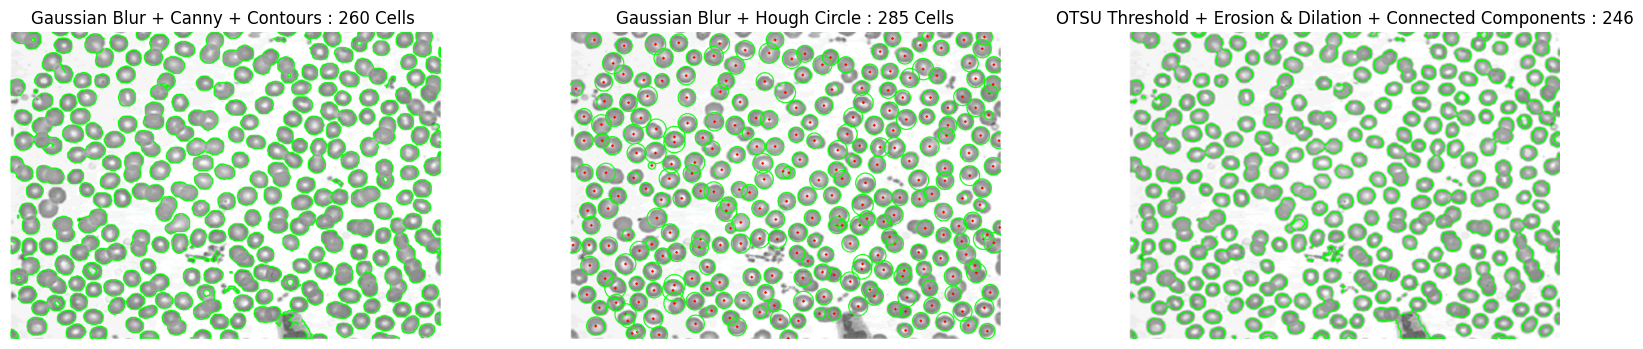

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(20, 4))

titles = ['Gaussian Blur + Canny + Contours : 260 Cells ',  'Gaussian Blur + Hough Circle : 285 Cells',  'OTSU Threshold + Erosion & Dilation + Connected Components : 246']
images = [method_a, method_b , method_c]
cmaps = [None, None, None ]

for i in range(3):
    if cmaps[i] is None:
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    else:
        axes[i].imshow(images[i], cmap=cmaps[i])
    axes[i].set_title(titles[i])
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.3)
plt.show()